<a href="https://colab.research.google.com/github/nair9/MachineLearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The MNIST database (Modified National Institute of Standards and Technology database), a database of handwritten digits that is commonly used for training various image processing systems is used to implement a CNN model.

Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Importing data from drive

In [ ]:
(X_train, Y_train),(X_test, Y_test) = keras.datasets.mnist.load_data()
print("Length of X_Train",len(X_train))
print("Length of X_Test",len(X_test))
print("Length of Y_Train",len(Y_train))
print("Length of Y_Test",len(Y_test))
print(X_train.shape)
print(Y_train.shape[0])
print(X_test.shape)
print(Y_test.shape[0])

11490434/11490434 [==============================] - 0s 0us/step
Length of X_Train 60000
Length of X_Test 10000
Length of Y_Train 60000
Length of Y_Test 10000
(60000, 28, 28)
60000
(10000, 28, 28)
10000


In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

In [ ]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


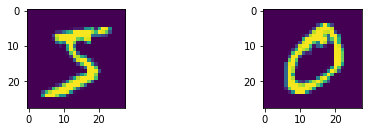

In [ ]:
plt.subplot(231)
plt.imshow(X_train[0, :, :, 0])
print(Y_train[0],end=' ')
plt.subplot(233)
plt.imshow(X_train[1, :, :, 0])
print(Y_train[1])

Building CNN Model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

Fitting the dataset to the model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 50s 116ms/step - loss: 0.3612 - accuracy: 0.8898 - val_loss: 0.0826 - val_accuracy: 0.9783
Epoch 2/15
422/422 [==============================] - 50s 119ms/step - loss: 0.1149 - accuracy: 0.9639 - val_loss: 0.0558 - val_accuracy: 0.9852
Epoch 3/15
422/422 [==============================] - 48s 113ms/step - loss: 0.0850 - accuracy: 0.9734 - val_loss: 0.0450 - val_accuracy: 0.9877
Epoch 4/15
422/422 [==============================] - 48s 114ms/step - loss: 0.0703 - accuracy: 0.9778 - val_loss: 0.0404 - val_accuracy: 0.9897
Epoch 5/15
422/422 [==============================] - 50s 118ms/step - loss: 0.0628 - accuracy: 0.9801 - val_loss: 0.0386 - val_accuracy: 0.9902
Epoch 6/15
422/422 [==============================] - 49s 117ms/step - loss: 0.0570 - accuracy: 0.9825 - val_loss: 0.0359 - val_accuracy: 0.9908
Epoch 7/15
422/422 [==============================] - 47s 112ms/step - loss: 0.0526 - accuracy: 0.9832 - val_loss: 0.0360 - val_ac

Model evaluation

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02634885534644127
Test accuracy: 0.9909999966621399


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


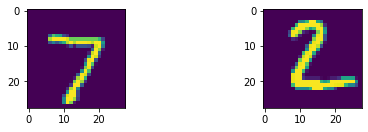

In [ ]:
plt.subplot(231)
plt.imshow(X_test[0, :, :, 0])
print(Y_test[0],end=' ')
plt.subplot(233)
plt.imshow(X_test[1, :, :, 0])
print(Y_test[1])

The CNN Model gives an accuracy of 99% with a loss of 2.5% on the MNIST Dataset